In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="bxLr4qTnjTXxcJEJRPwk")
project = rf.workspace("vivek-dan").project("dataset-for-detecting-obstacles-on-railways-dogeu-vjf1r")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Dataset-for-Detecting-Obstacles-on-Railways-1 in yolov11:: 100%|██████████| 3538/3538 [00:02<00:00, 1342.14it/s]



0: 640x640 2 Persons, 181.3ms
Speed: 6.4ms preprocess, 181.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Calibration class 'Person' detected with width in pixels: 74.196044921875
Calculated focal length: 1154.16064453125

0: 640x640 2 Persons, 119.6ms
Speed: 5.3ms preprocess, 119.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


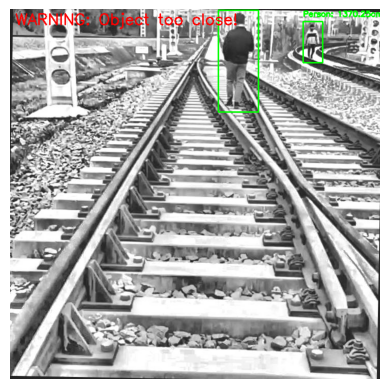


0: 512x640 10 Animals, 1 Person, 132.1ms
Speed: 3.6ms preprocess, 132.1ms inference, 7.5ms postprocess per image at shape (1, 3, 512, 640)


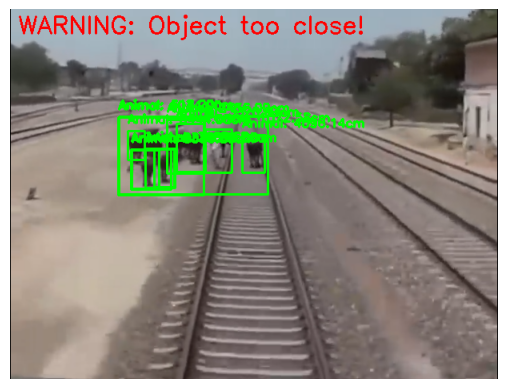


0: 480x640 1 Animal, 138.8ms
Speed: 0.0ms preprocess, 138.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


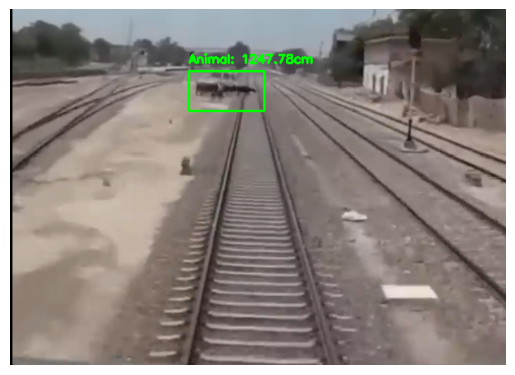


0: 448x640 2 Animals, 110.7ms
Speed: 0.5ms preprocess, 110.7ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


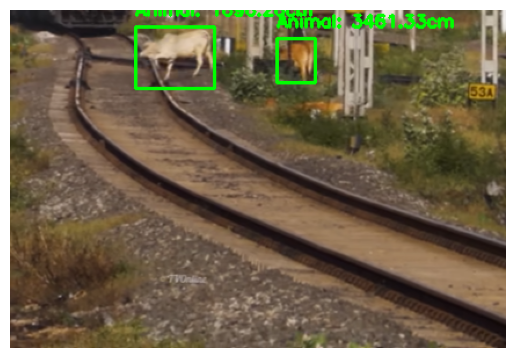


0: 640x608 1 Animal, 1 Tree, 172.1ms
Speed: 0.0ms preprocess, 172.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 608)


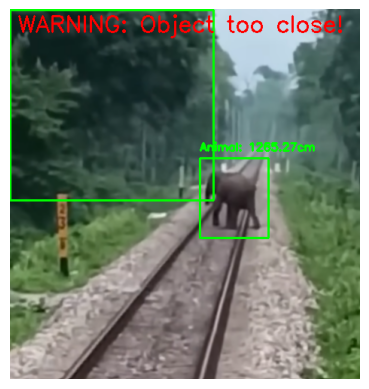


0: 640x576 1 Animal, 167.1ms
Speed: 0.0ms preprocess, 167.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 576)


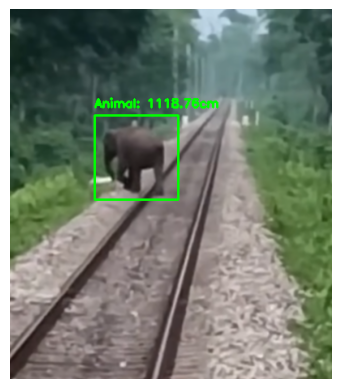


0: 640x608 2 Animals, 147.6ms
Speed: 1.9ms preprocess, 147.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 608)


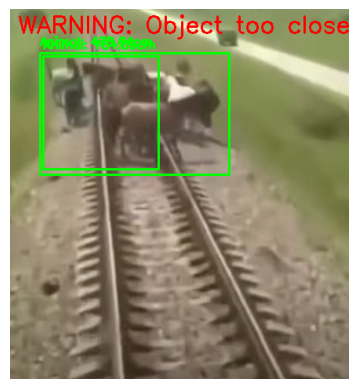


0: 640x512 3 Persons, 3 Trees, 170.3ms
Speed: 3.4ms preprocess, 170.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


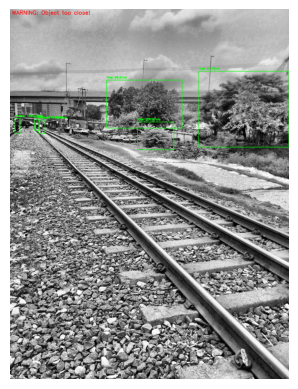


0: 640x512 3 Persons, 3 Trees, 154.3ms
Speed: 3.0ms preprocess, 154.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


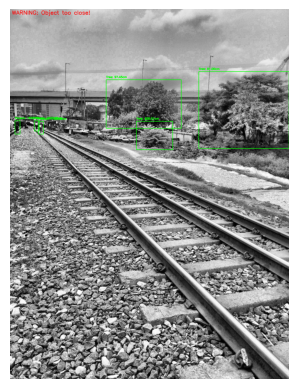


0: 640x512 3 Persons, 3 Trees, 120.3ms
Speed: 3.7ms preprocess, 120.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


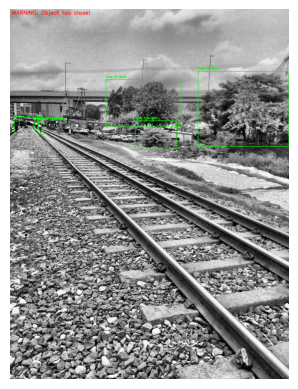


0: 640x512 8 Persons, 2 Trees, 102.3ms
Speed: 12.5ms preprocess, 102.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


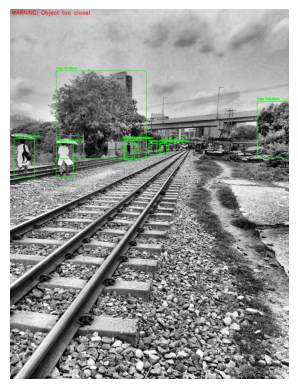


0: 640x512 8 Persons, 2 Trees, 178.1ms
Speed: 3.9ms preprocess, 178.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 512)


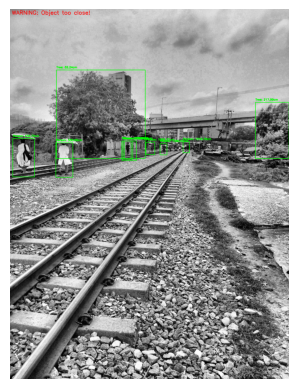


0: 640x512 7 Persons, 2 Trees, 124.2ms
Speed: 3.8ms preprocess, 124.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


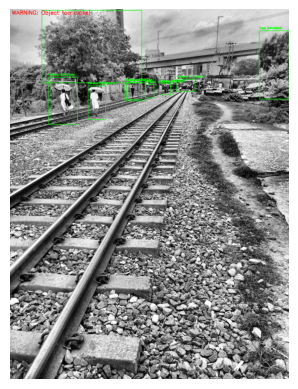


0: 640x512 6 Persons, 2 Trees, 172.3ms
Speed: 3.5ms preprocess, 172.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)


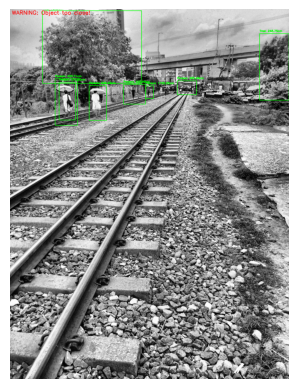


0: 640x512 6 Persons, 3 Trees, 136.4ms
Speed: 4.8ms preprocess, 136.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


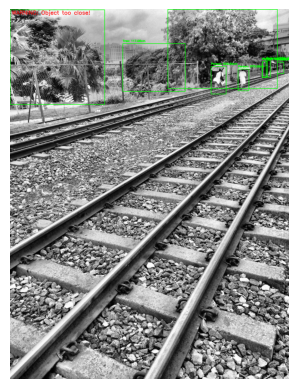


0: 640x512 5 Persons, 3 Trees, 149.4ms
Speed: 10.8ms preprocess, 149.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


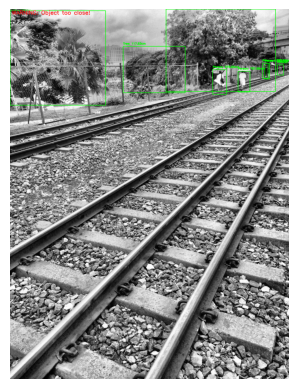


0: 640x512 2 Persons, 6 Trees, 171.3ms
Speed: 3.6ms preprocess, 171.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


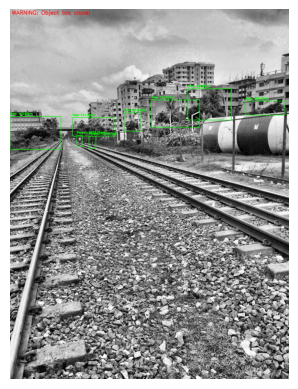


0: 640x512 6 Persons, 130.9ms
Speed: 1.2ms preprocess, 130.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 512)


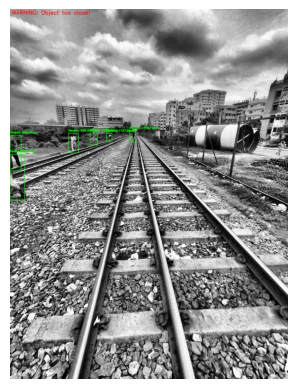


0: 640x512 5 Persons, 143.4ms
Speed: 2.7ms preprocess, 143.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 512)


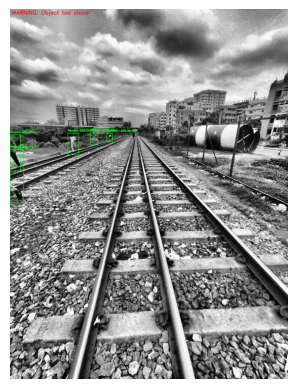


0: 640x512 2 Persons, 5 Trees, 176.3ms
Speed: 6.6ms preprocess, 176.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


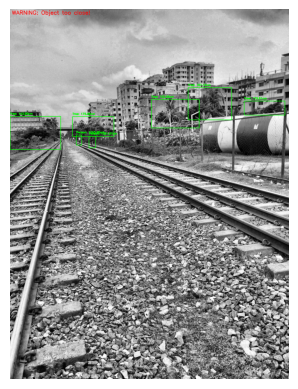


0: 640x512 2 Persons, 6 Trees, 190.1ms
Speed: 2.0ms preprocess, 190.1ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 512)


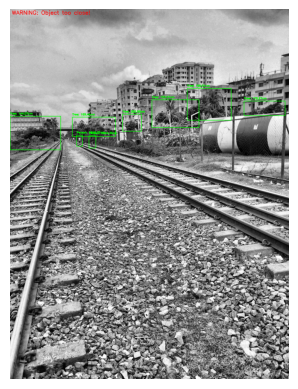


0: 640x512 3 Persons, 200.7ms
Speed: 2.1ms preprocess, 200.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)


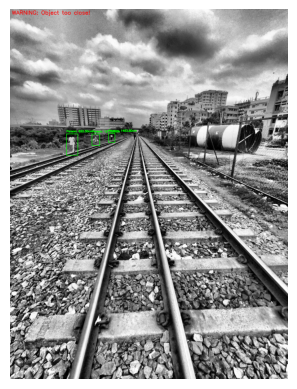


0: 640x512 3 Persons, 177.0ms
Speed: 2.4ms preprocess, 177.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


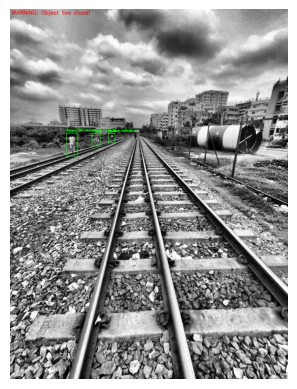


0: 640x512 3 Persons, 195.3ms
Speed: 2.8ms preprocess, 195.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


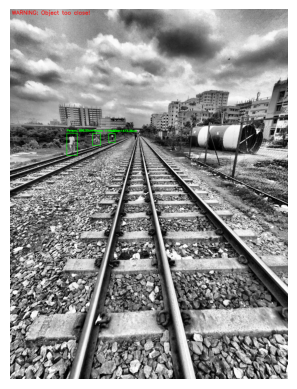


0: 640x512 1 Person, 6 Trees, 199.6ms
Speed: 2.7ms preprocess, 199.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


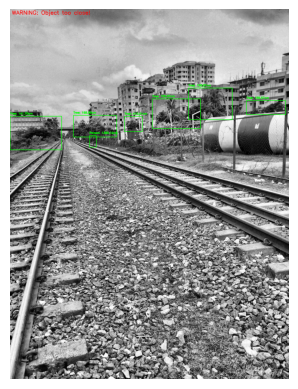

In [1]:
#distance detection :
import cv2
import numpy as np
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt

# Known parameters for real-world object widths (in cm)
KNOWN_WIDTH = {
    'Animal': 100,
    'Car': 180,
    'Person': 45,
    'Tree' : 35
}

def calibrate_focal_length(known_distance, real_width, width_in_pixels):
    """Calibrate the focal length of the camera."""
    return (width_in_pixels * known_distance) / real_width

def calculate_distance(focal_length, real_width, width_in_pixels):
    """Calculate the distance from the camera to the object."""
    return (real_width * focal_length) / width_in_pixels

# Load your trained model
model = YOLO('best_99).pt')

# Calibration image path
calibration_image_path = r'E:\exceed_4_video\Dataset-for-Detecting-Obstacles-on-Railways-1\train\images\abnormal-319-_jpg.rf.2d8201f7a65edd284da5a80bc181307c.jpg'
CALIBRATION_DISTANCE = 700 # known distance in cm
calibration_class = 'Person'

# Calibrate focal length
calibration_image = cv2.imread(calibration_image_path)
focal_length = None

results = model(calibration_image)
detected = False

for r in results:
    boxes = r.boxes
    for box in boxes:
        cls = int(box.cls[0])
        class_name = model.names[cls]
        if class_name == calibration_class:
            x1, y1, x2, y2 = box.xyxy[0]
            width_in_pixels = x2 - x1
            focal_length = calibrate_focal_length(
                CALIBRATION_DISTANCE,
                KNOWN_WIDTH[calibration_class],
                width_in_pixels
            )
            detected = True
            print(f"Calibration class '{calibration_class}' detected with width in pixels: {width_in_pixels}")
            print(f"Calculated focal length: {focal_length}")
            break

if not detected:
    print("Calibration failed: Object not detected or no calibration class in image.")
    raise ValueError("Focal length could not be determined. Check the calibration image and class.")

# Directory containing test images
image_directory = r'E:\exceed_4_video\train_video_ing'
output_directory = r'path_to_output_1'  # Replace with your output directory path

# Create output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Process only the first 25 images
image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))][:25]

for image_file in image_files:
    # Read image
    image_path = os.path.join(image_directory, image_file)
    frame = cv2.imread(image_path)

    results = model(frame)

    for r in results:
        boxes = r.boxes
        for box in boxes:
            # Get detection info
            x1, y1, x2, y2 = box.xyxy[0]
            cls = int(box.cls[0])
            class_name = model.names[cls]
            conf = box.conf[0]

            # Calculate width in pixels and distance
            width_in_pixels = x2 - x1
            if class_name in KNOWN_WIDTH:
                distance = calculate_distance(
                    focal_length,
                    KNOWN_WIDTH[class_name],
                    width_in_pixels
                )

                # Draw bounding box and label with distance
                cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
                label = f"{class_name}: {distance:.2f}cm"
                cv2.putText(frame, label, (int(x1), int(y1-10)),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                # Warning for close objects
                if distance < 1000:  # 10 meters
                    warning = "WARNING: Object too close!"
                    cv2.putText(frame, warning, (10, 30),
                              cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Save the processed image
    output_path = os.path.join(output_directory, f'processed_{image_file}')
    cv2.imwrite(output_path, frame)

    # Display the image using Matplotlib
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [6]:
import cv2
import numpy as np
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt

# Known parameters for real-world object widths (in cm)
KNOWN_WIDTH = {
    'Animal': 100,
    'Car': 180,
    'Person': 45,
    'Rock': 50,
    'Trash': 40
}

def calibrate_focal_length(known_distance, real_width, width_in_pixels):
    """Calibrate the focal length of the camera."""
    return (width_in_pixels * known_distance) / real_width

def calculate_distance(focal_length, real_width, width_in_pixels):
    """Calculate the distance from the camera to the object."""
    return (real_width * focal_length) / width_in_pixels

# Load your trained model
model = YOLO('best_99).pt')

# Calibration image path
calibration_image_path = r'E:\exceed_4_video\Dataset-for-Detecting-Obstacles-on-Railways-1\train\images\abnormal-319-_jpg.rf.2d8201f7a65edd284da5a80bc181307c.jpg'
CALIBRATION_DISTANCE = 700  # known distance in cm
calibration_class = 'Person'

# Calibrate focal length
calibration_image = cv2.imread(calibration_image_path)
focal_length = None

results = model(calibration_image)
detected = False

for r in results:
    boxes = r.boxes
    for box in boxes:
        cls = int(box.cls[0])
        class_name = model.names[cls]
        if class_name == calibration_class:
            x1, y1, x2, y2 = box.xyxy[0]
            width_in_pixels = x2 - x1
            focal_length = calibrate_focal_length(
                CALIBRATION_DISTANCE,
                KNOWN_WIDTH[calibration_class],
                width_in_pixels
            )
            detected = True
            print(f"Calibration class '{calibration_class}' detected with width in pixels: {width_in_pixels}")
            print(f"Calculated focal length: {focal_length}")
            break

if not detected:
    print("Calibration failed: Object not detected or no calibration class in image.")
    raise ValueError("Focal length could not be determined. Check the calibration image and class.")

# Video path
video_path = r'E:\exceed_4_video\Test.mp4'
output_path = r'E:\exceed_4_video\output_test.mp4'

# Open the video
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

frame_count = 0
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

try:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
            
        frame_count += 1
        if frame_count % 30 == 0:  # Update progress every 30 frames
            progress = (frame_count / total_frames) * 100
            print(f"Processing: {progress:.1f}% complete")

        results = model(frame)

        for r in results:
            boxes = r.boxes
            for box in boxes:
                # Get detection info
                x1, y1, x2, y2 = box.xyxy[0]
                cls = int(box.cls[0])
                class_name = model.names[cls]
                conf = box.conf[0]

                # Calculate width in pixels and distance
                width_in_pixels = x2 - x1
                if class_name in KNOWN_WIDTH:
                    distance = calculate_distance(
                        focal_length,
                        KNOWN_WIDTH[class_name],
                        width_in_pixels
                    )

                    # Draw bounding box and label with distance
                    cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
                    label = f"{class_name}: {distance:.2f}cm"
                    cv2.putText(frame, label, (int(x1), int(y1-10)),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                    # Warning for close objects
                    if distance < 1000:  # 10 meters
                        warning = "WARNING: Object too close!"
                        cv2.putText(frame, warning, (10, 30),
                                  cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Write the frame to output video
        out.write(frame)

finally:
    # Release everything when done
    cap.release()
    out.release()

print("Video processing completed. Output saved to:", output_path)


0: 640x640 2 Persons, 97.2ms
Speed: 3.1ms preprocess, 97.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Calibration class 'Person' detected with width in pixels: 74.196044921875
Calculated focal length: 1154.16064453125

0: 640x384 1 Tree, 71.2ms
Speed: 2.0ms preprocess, 71.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Tree, 65.7ms
Speed: 1.2ms preprocess, 65.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Tree, 63.3ms
Speed: 1.0ms preprocess, 63.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Tree, 62.4ms
Speed: 1.0ms preprocess, 62.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Tree, 71.6ms
Speed: 1.0ms preprocess, 71.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Tree, 67.9ms
Speed: 1.0ms preprocess, 67.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1

In [7]:
import cv2
import numpy as np
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt

# Known parameters for real-world object widths (in cm)
KNOWN_WIDTH = {
    'Animal': 100,
    'Car': 180,
    'Person': 45,
    'Rock': 50,
    'Trash': 40
}

def calibrate_focal_length(known_distance, real_width, width_in_pixels):
    """Calibrate the focal length of the camera."""
    return (width_in_pixels * known_distance) / real_width

def calculate_distance(focal_length, real_width, width_in_pixels):
    """Calculate the distance from the camera to the object."""
    return (real_width * focal_length) / width_in_pixels

# Load your trained model
model = YOLO('best_99).pt')

# Calibration image path
calibration_image_path = r'E:\exceed_4_video\Dataset-for-Detecting-Obstacles-on-Railways-1\train\images\abnormal-319-_jpg.rf.2d8201f7a65edd284da5a80bc181307c.jpg'
CALIBRATION_DISTANCE = 700  # known distance in cm
calibration_class = 'Person'

# Calibrate focal length
calibration_image = cv2.imread(calibration_image_path)
focal_length = None

results = model(calibration_image)
detected = False

for r in results:
    boxes = r.boxes
    for box in boxes:
        cls = int(box.cls[0])
        class_name = model.names[cls]
        if class_name == calibration_class:
            x1, y1, x2, y2 = box.xyxy[0]
            width_in_pixels = x2 - x1
            focal_length = calibrate_focal_length(
                CALIBRATION_DISTANCE,
                KNOWN_WIDTH[calibration_class],
                width_in_pixels
            )
            detected = True
            print(f"Calibration class '{calibration_class}' detected with width in pixels: {width_in_pixels}")
            print(f"Calculated focal length: {focal_length}")
            break

if not detected:
    print("Calibration failed: Object not detected or no calibration class in image.")
    raise ValueError("Focal length could not be determined. Check the calibration image and class.")

# Video path
video_path = r'E:\exceed_4_video\test_2.mp4'
output_path = r'E:\exceed_4_video\output_test_2.mp4'

# Open the video
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

frame_count = 0
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

try:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
            
        frame_count += 1
        if frame_count % 30 == 0:  # Update progress every 30 frames
            progress = (frame_count / total_frames) * 100
            print(f"Processing: {progress:.1f}% complete")

        results = model(frame)

        for r in results:
            boxes = r.boxes
            for box in boxes:
                # Get detection info
                x1, y1, x2, y2 = box.xyxy[0]
                cls = int(box.cls[0])
                class_name = model.names[cls]
                conf = box.conf[0]

                # Calculate width in pixels and distance
                width_in_pixels = x2 - x1
                if class_name in KNOWN_WIDTH:
                    distance = calculate_distance(
                        focal_length,
                        KNOWN_WIDTH[class_name],
                        width_in_pixels
                    )

                    # Draw bounding box and label with distance
                    cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
                    label = f"{class_name}: {distance:.2f}cm"
                    cv2.putText(frame, label, (int(x1), int(y1-10)),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                    # Warning for close objects
                    if distance < 1000:  # 10 meters
                        warning = "WARNING: Object too close!"
                        cv2.putText(frame, warning, (10, 30),
                                  cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Write the frame to output video
        out.write(frame)

finally:
    # Release everything when done
    cap.release()
    out.release()

print("Video processing completed. Output saved to:", output_path)


0: 640x640 2 Persons, 130.8ms
Speed: 2.1ms preprocess, 130.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Calibration class 'Person' detected with width in pixels: 74.196044921875
Calculated focal length: 1154.16064453125

0: 640x384 (no detections), 79.4ms
Speed: 3.0ms preprocess, 79.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 89.3ms
Speed: 0.0ms preprocess, 89.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 86.2ms
Speed: 3.2ms preprocess, 86.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 93.2ms
Speed: 0.0ms preprocess, 93.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 75.8ms
Speed: 0.0ms preprocess, 75.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 81.5ms
Speed: 1.9ms preprocess, 81.5ms inference, 0.0ms postp

In [8]:
import cv2
import numpy as np
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt

# Known parameters for real-world object widths (in cm)
KNOWN_WIDTH = {
    'Animal': 100,
    'Car': 180,
    'Person': 45,
    'Rock': 50,
    'Trash': 40
}

def calibrate_focal_length(known_distance, real_width, width_in_pixels):
    """Calibrate the focal length of the camera."""
    return (width_in_pixels * known_distance) / real_width

def calculate_distance(focal_length, real_width, width_in_pixels):
    """Calculate the distance from the camera to the object."""
    return (real_width * focal_length) / width_in_pixels

# Load your trained model
model = YOLO('best_99).pt')

# Calibration image path
calibration_image_path = r'E:\exceed_4_video\Dataset-for-Detecting-Obstacles-on-Railways-1\train\images\abnormal-319-_jpg.rf.2d8201f7a65edd284da5a80bc181307c.jpg'
CALIBRATION_DISTANCE = 700  # known distance in cm
calibration_class = 'Person'

# Calibrate focal length
calibration_image = cv2.imread(calibration_image_path)
focal_length = None

results = model(calibration_image)
detected = False

for r in results:
    boxes = r.boxes
    for box in boxes:
        cls = int(box.cls[0])
        class_name = model.names[cls]
        if class_name == calibration_class:
            x1, y1, x2, y2 = box.xyxy[0]
            width_in_pixels = x2 - x1
            focal_length = calibrate_focal_length(
                CALIBRATION_DISTANCE,
                KNOWN_WIDTH[calibration_class],
                width_in_pixels
            )
            detected = True
            print(f"Calibration class '{calibration_class}' detected with width in pixels: {width_in_pixels}")
            print(f"Calculated focal length: {focal_length}")
            break

if not detected:
    print("Calibration failed: Object not detected or no calibration class in image.")
    raise ValueError("Focal length could not be determined. Check the calibration image and class.")

# Video path
video_path = r'E:\exceed_4_video\test_3.mp4'
output_path = r'E:\exceed_4_video\output_test_3.mp4'

# Open the video
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

frame_count = 0
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

try:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
            
        frame_count += 1
        if frame_count % 30 == 0:  # Update progress every 30 frames
            progress = (frame_count / total_frames) * 100
            print(f"Processing: {progress:.1f}% complete")

        results = model(frame)

        for r in results:
            boxes = r.boxes
            for box in boxes:
                # Get detection info
                x1, y1, x2, y2 = box.xyxy[0]
                cls = int(box.cls[0])
                class_name = model.names[cls]
                conf = box.conf[0]

                # Calculate width in pixels and distance
                width_in_pixels = x2 - x1
                if class_name in KNOWN_WIDTH:
                    distance = calculate_distance(
                        focal_length,
                        KNOWN_WIDTH[class_name],
                        width_in_pixels
                    )

                    # Draw bounding box and label with distance
                    cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
                    label = f"{class_name}: {distance:.2f}cm"
                    cv2.putText(frame, label, (int(x1), int(y1-10)),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                    # Warning for close objects
                    if distance < 1000:  # 10 meters
                        warning = "WARNING: Object too close!"
                        cv2.putText(frame, warning, (10, 30),
                                  cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Write the frame to output video
        out.write(frame)

finally:
    # Release everything when done
    cap.release()
    out.release()

print("Video processing completed. Output saved to:", output_path)


0: 640x640 2 Persons, 190.2ms
Speed: 6.9ms preprocess, 190.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Calibration class 'Person' detected with width in pixels: 74.196044921875
Calculated focal length: 1154.16064453125

0: 384x640 (no detections), 125.9ms
Speed: 4.8ms preprocess, 125.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 83.8ms
Speed: 1.2ms preprocess, 83.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 101.0ms
Speed: 0.9ms preprocess, 101.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 91.3ms
Speed: 4.0ms preprocess, 91.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 84.6ms
Speed: 0.0ms preprocess, 84.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 77.5ms
Speed: 1.1ms preprocess, 77.5ms inference, 0.0ms p